<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Tarea_00_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Problema: Dataset de pingüinos: Este problema es entregable

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```
Estas preguntas los guiarán a realizar un análisis descriptivo del dataset y a realizar un test de hipótesis.

## Primera aproximación a los datos de forma general y su limpieza:

1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?
2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.
3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?
4. Repita la pregunta anterior observando las especies.

## Tendencias y visualizacion de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?
6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?
8. Describa la distribucion con ayuda de la media, desviacion estandard
9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?
11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?


## Relación entre caracteristicas de los pingüinos

14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?



## Test de hipótesis

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.
















# **Solucion (guia paso a paso para realizar un análisis descriptivo del dataset y para realizar un test de hipótesis):**




## **Primera aproximación a los datos de forma general y su limpieza:**

* Importacion de datos y llamado de librerias a usar en este cuaderno (y por ello en la resolucion).... siguiendo el enunciado general:

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns  #-libreria de visualizacion de datos en Python, cuya utilidad por ahora se resume en que trae consigo una coleccion de datasets de ejm

# Cargar el dataset
df = sns.load_dataset('penguins')  #  por lo que nos va sevir para cagar estos datos, para la realizacion de la actividad-

* Visualizacion general (como lucen) de los datos-tabla-data frame cargado:

In [136]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [138]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?

In [139]:
df.species.unique()  #-para saber cuantas especies diferentes hay, basta con ver el campo-columna species y mirar sus registros, "filtrando" con unique para que
                     #  aparezcan sin copia-duplicados (sin registros-filas duplicadas pues pues)-

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [140]:
df[df.species=="Chinstrap"].head()  #-esto lo hago porque queria verificar xD, pues en la general no se veia ninguno de esta especie-

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,Male
155,Chinstrap,Dream,45.4,18.7,188.0,3525.0,Female
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,Male


In [141]:
df.columns  #-aca con esto, y en general lo visto hasta ahora que las carateristicas que se miran para las 3 especies son 'species', 'island', 'bill_length_mm',
            #  'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'...... bill se traduce al parecer como pico y flipper es aleta, entonces que altea xD,
            #  lo que se mira son dimesniones del pico largo y ancho, aleta largo, peso y sexo. Distancias en milimetros y peso en gramos-

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.

Bueno, suponiendo que las variables son las columnas, y suponiendo valores faltantes como los NaN (seria raro que hayan +/-inf's), se propone lo siguiente

In [142]:
df.where(df.isin([np.inf,-np.inf])).dropna()  #-comprobamos asi que no hay +/-inf's-

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [143]:
mask = df.isnull()  #-con esto miramos cuantos registros-filas tienen NaN por cada campo-columna-
mask.sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [144]:
df_limpio = df.replace([np.inf,-np.inf], np.nan).copy()  #-si hubiesemos encontrado +/-inf's esta linea seria necesario, aun asi la voy a dejar for fun-
df_limpio = df_limpio.dropna()
df_limpio   #-ya aca es la tabla tq no hay NaN en ningun registro-

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [145]:
df_limpio = df_limpio.reset_index()  #-reseteamos los indices para que se "actualicen" a la nueva cantidad de datos post extraccion... vea que se quitaron 11, lo cual
                                     #  muestra consistencia con el .sum() sobre la mascara anterior-
df_limpio

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...,...
328,338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?

In [147]:
df.island.unique()  #-con estos miramos cuantas islas diferentes entre si hay.... uso df porque la idea es ver numero de pinguinos, asi no sepamos sus medidas
                    #  o genero, no?....pues note que de los visto de los datos sin limpiar con .info() sabemos que en el campo species no hay ningun NaN-

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [148]:
df[df.island == 'Torgersen']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [149]:
df[df.island == 'Torgersen'].reset_index()

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [150]:
df[df.island == 'Torgersen'].info()   #-vemos que hay 52 registros i,e 52 pinguinos en Torgersen-

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 131
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            52 non-null     object 
 1   island             52 non-null     object 
 2   bill_length_mm     51 non-null     float64
 3   bill_depth_mm      51 non-null     float64
 4   flipper_length_mm  51 non-null     float64
 5   body_mass_g        51 non-null     float64
 6   sex                47 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.2+ KB


In [151]:
df[df.island == 'Biscoe'].info()   #-vemos que hay 168 registros i,e 168 pinguinos en Biscoe-

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 20 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            168 non-null    object 
 1   island             168 non-null    object 
 2   bill_length_mm     167 non-null    float64
 3   bill_depth_mm      167 non-null    float64
 4   flipper_length_mm  167 non-null    float64
 5   body_mass_g        167 non-null    float64
 6   sex                163 non-null    object 
dtypes: float64(4), object(3)
memory usage: 10.5+ KB


In [152]:
df[df.island == 'Dream'].info()   #-vemos que hay 124 registros i,e 124 pinguinos en Dream-

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 30 to 219
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            124 non-null    object 
 1   island             124 non-null    object 
 2   bill_length_mm     124 non-null    float64
 3   bill_depth_mm      124 non-null    float64
 4   flipper_length_mm  124 non-null    float64
 5   body_mass_g        124 non-null    float64
 6   sex                123 non-null    object 
dtypes: float64(4), object(3)
memory usage: 7.8+ KB


De entre las islas Torgersen, Biscoe y Dream, la que mas tiene pinguinos es Biscoe (luego Dream, luego Torgersen). De manera que se demuestra que si hay un desbalance en el numero total de isla en isla (no todas tiene le mismo numero de registros)

4. Repita la pregunta anterior observando las especies.

Interpretando, entonces diria que: ¿Cuál es la especie con mayor número de islas en el dataset? ¿Hay un desbalance en número en el número de islas por especie? ¿XD?

Bueno, demas que es mirar-dar fe de como se distribuyen los tipos de pinguinos-especies por isla


In [153]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [154]:
df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [155]:
#df.set_index("species")
#df.set_index("island")
df.set_index(['island','species'])

bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    species                                                     
Torgersen Adelie             39.1           18.7              181.0   
          Adelie             39.5           17.4              186.0   
          Adelie             40.3           18.0              195.0   
          Adelie              NaN            NaN                NaN   
          Adelie             36.7           19.3              193.0   
...                           ...            ...                ...   
Biscoe    Gentoo              NaN            NaN                NaN   
          Gentoo             46.8           14.3              215.0   
          Gentoo             50.4           15.7              222.0   
          Gentoo             45.2           14.8              212.0   
          Gentoo             49.9           16.1              213.0   

                   body_mass_g     sex  
island    species                       
Torgersen Adelie        3750.0    Male  
          Adelie        3800.0  Female  
          Adelie        3250.0  Female  
          Adelie           NaN     NaN  
          Adelie        3450.0  Female  
...                        ...     ...  
Biscoe    Gentoo           NaN     NaN  
          Gentoo        4850.0  Female  
          Gentoo        5750.0    Male  
          Gentoo        5200.0  Female  
          Gentoo        5400.0    Male  

[344 rows x 5 columns]

In [82]:
df.groupby("island")["species"].count()  #-esto es lo anterior (una forma de resolver el anterior punto), ignoremoslo xD-

,species
island,
Biscoe,168
Dream,124
Torgersen,52


In [83]:
df.groupby("species")["island"].count()   #-incompleto, no muestra como se reparte por isla, solo el numero total-

,island
species,
Adelie,152
Chinstrap,68
Gentoo,124


In [156]:
df.groupby(["island", "species"])["species"].count()   #-esta la ponogo porque es bonita y complementa bien el anterior punto, y tiene que ver con lo de aca, pero mejor
                                                       #  seria la siguiente, por lo preguntado-

island     species  
Biscoe     Adelie        44
           Gentoo       124
Dream      Adelie        56
           Chinstrap     68
Torgersen  Adelie        52
Name: species, dtype: int64

In [157]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [158]:
df.groupby(["species", "island"])["island"].count()   #-i,e esta-

species    island   
Adelie     Biscoe        44
           Dream         56
           Torgersen     52
Chinstrap  Dream         68
Gentoo     Biscoe       124
Name: island, dtype: int64

Entonces con estas tablitas queda claro que la especie que ha llegado a un mayor numero de islas es Adelie y es la de mayor poblacion. Ya Chinstrap	y Gentoo se encuentras exclusivamente en las islas Dream y Biscoe..... cabe notar que:
* Hay mas Gentoo's que Chinstrap's

* En Torgersen solo hay Adelie's y al mismo tiempo es la menos habitada de las 3 islas

* Y los Adelie's se amañan mas-hay mas en Dream que en Biscoe, incluso se amañan mas en Torgersen que en Biscoe (puede que su relacion con Chinstrap's	y Gentoo's sea un factor, mas no super pesado pues tenemos 44 vs 56.... apesar de que Chinstrap/Gentoo = 68/124), aunque note que las variaciones no son tan bruscas i,e se encuentran divididos-repartidos en las diferentes islas, de manera bastante uniforme (lo unico que necesitan es como que espacio, parece ser que le plantan cara a cualquier cosa sin mayor dificultad, aun asi para una explocion poblacional en una sola localidad, quien sabe que necesiten).

* A pesar de lo expuesto al incio del punto anterior, note que Biscoe tiene mayor poblacion en general, porque los Gentoo's en esa isla son muy prosperos si pensamos en la relacion especie por isla notamos que estos tienen un maximo de 124 sobre pasando por mucho los maximos que puedan tener las otras especies, donde luego seguirian los Chinstrap's y de ultimo los Adelie's (notandose asi pues como los Gentoo's explotan poblacionalmente en una sola localidad mucho mas que los otros)

* Remarcar que entonces hay un desbalance grande en la ocupacion de las islas por parte de los pinguinos (las diferentes especies) siendo el caso de los Gentoo's y los Chinstrap's los mas remarcados en cuanto solo habitan una isla y siendo el caso de los Adelie's la menos preocupante, en cuanto es casi uniforme (su promedio debe de ser arox de 50 y la mayor variacion es de aprox 6)

## **Tendencias y visualizacion de las variables**

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?

In [159]:
df_limpio.species.unique()  #-recuperemos-usemos df_limpio para estos calculos, pa que no haya valores NaN.... podria ser mas flexible y usar incluso aquellos
                            #  registros-filas que no tienen NaN excepto en sexo, pero, por coherencia con 2 y por ellos con lo que establecimos como limpiar los datos
                            #  me abstendre a no hacerlo-

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [160]:
#-a la final use df xD, porque igual hacia los calculos aun teniendo los NaN's-
print(df[df.species == 'Adelie'].bill_length_mm.mean())  #-promedio-
print(df[df.species == 'Adelie'].bill_length_mm.std())   #-desv estadar muestral i,e divide n-1-

#-A diferencia de numpy, si uno no especifica a std con Delta Degrees Of Freedom, nos calcula por defecto la muestral, a continuacion la dm de ello:_
print(np.std(df[df.species == 'Adelie'].bill_length_mm))           #-desv estandar poblacional i,e con ddof=0, lo cual esta seleccionado por defecto-
print(np.std(df[df.species == 'Adelie'].bill_length_mm, ddof=1))   #-desv estandar muestral i,e con ddof=1-

38.79139072847682
2.6634048483686197
2.6545709771066255
2.6634048483686197


In [161]:
print(df[df.species == 'Chinstrap'].bill_length_mm.mean())
print(df[df.species == 'Chinstrap'].bill_length_mm.std() )  #-asumo muestral, porque demas que no midieron a todos los pinguinos aunque idk-

48.83382352941177
3.3392558959358865


In [162]:
print(df[df.species == 'Gentoo'].bill_length_mm.mean())
print(df[df.species == 'Gentoo'].bill_length_mm.std())

47.50487804878048
3.081857372114287


6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

In [163]:
df.describe()   #-recuperemos el original pa saber quien tiene el pico mas largo-

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [165]:
df[df.bill_length_mm == 59.6]  #-.... otra era usando df.bill_length_mm.max().... el caso es que el del pico mas largo es de un macho Gentoo de la isla de Biscoe-

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male


7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?

In [166]:
df.groupby("species").body_mass_g.describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,151.0,3700.662252,458.566126,2850.0,3350.0,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,123.0,5076.016260,504.116237,3950.0,4700.0,5000.0,5500.0,6300.0


como la media coincide-esta muy cerca con el percentil 50 (i,e sel segundo cuartil Q2 i,e la mediana i,e el 50% de los datos esta debajo y el otro 50% por encima i,e la mitad de los datos) yo me la jugaria a que es una tipo gaussiana. Ademas de que 1 std parece acobijar en los 3 casos hasta el 25% y el 75% i,e con seguridad esta cerca de acobijar el 34.1% por encima y por abajo en cada caso (asegurando simetria pues y posiblemente forma de campana)

8. Describa la distribucion con ayuda de la media, desviacion estandard

hombre..... en el punto anterior hice eso, entonces no se como debia interpretar el anterior o este. Por ello, simplemente aca voy a plotear xD (aunque cabe notar que aca ploteo y calculo con la data limpiada)

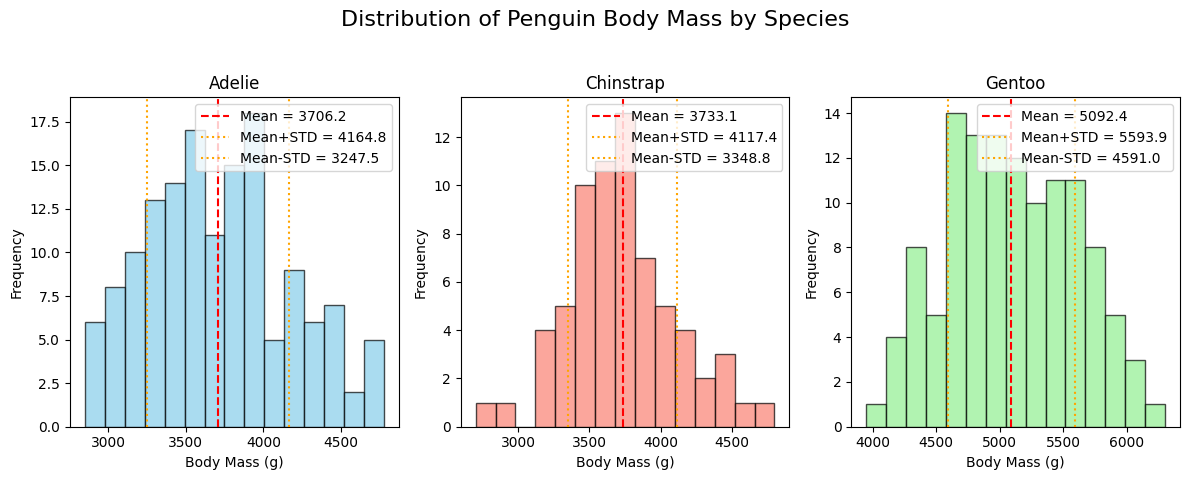

In [167]:
# @title
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
# Adelie
plt.subplot(1, 3, 1)
data = df_limpio[df_limpio.species=="Adelie"].body_mass_g
mean = data.mean()
std = data.std()
plt.hist(data, bins=15, color="skyblue", edgecolor="black", alpha=0.7)
plt.axvline(mean, color="red", linestyle="--", label=f"Mean = {mean:.1f}")
plt.axvline(mean+std, color="orange", linestyle=":", label=f"Mean+STD = {mean+std:.1f}")
plt.axvline(mean-std, color="orange", linestyle=":", label=f"Mean-STD = {mean-std:.1f}")
plt.title("Adelie")
plt.xlabel("Body Mass (g)")
plt.ylabel("Frequency")
plt.legend()

# Chinstrap
plt.subplot(1, 3, 2)
data = df_limpio[df_limpio.species=="Chinstrap"].body_mass_g
mean = data.mean()
std = data.std()
plt.hist(data, bins=15, color="salmon", edgecolor="black", alpha=0.7)
plt.axvline(mean, color="red", linestyle="--", label=f"Mean = {mean:.1f}")
plt.axvline(mean+std, color="orange", linestyle=":", label=f"Mean+STD = {mean+std:.1f}")
plt.axvline(mean-std, color="orange", linestyle=":", label=f"Mean-STD = {mean-std:.1f}")
plt.title("Chinstrap")
plt.xlabel("Body Mass (g)")
plt.ylabel("Frequency")
plt.legend()

# Gentoo
plt.subplot(1, 3, 3)
data = df_limpio[df_limpio.species=="Gentoo"].body_mass_g
mean = data.mean()
std = data.std()
plt.hist(data, bins=15, color="lightgreen", edgecolor="black", alpha=0.7)
plt.axvline(mean, color="red", linestyle="--", label=f"Mean = {mean:.1f}")
plt.axvline(mean+std, color="orange", linestyle=":", label=f"Mean+STD = {mean+std:.1f}")
plt.axvline(mean-std, color="orange", linestyle=":", label=f"Mean-STD = {mean-std:.1f}")
plt.title("Gentoo")
plt.xlabel("Body Mass (g)")
plt.ylabel("Frequency")
plt.legend()

plt.suptitle("Distribution of Penguin Body Mass by Species", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Bueno, ahi vemos que mas o menos. Tocaria hacer un test estadistico, pero obviemos eso por ahora.... ah bueno, y note que se hizo para los datos en limpio (sin NaN) porque plt tiene problemas con eso.

9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

In [168]:
df.groupby(["species","sex"]).body_mass_g.describe()

count         mean         std     min      25%     50%  \
species   sex                                                               
Adelie    Female   73.0  3368.835616  269.380102  2850.0  3175.00  3400.0   
          Male     73.0  4043.493151  346.811553  3325.0  3800.00  4000.0   
Chinstrap Female   34.0  3527.205882  285.333912  2700.0  3362.50  3550.0   
          Male     34.0  3938.970588  362.137550  3250.0  3731.25  3950.0   
Gentoo    Female   58.0  4679.741379  281.578294  3950.0  4462.50  4700.0   
          Male     61.0  5484.836066  313.158596  4750.0  5300.00  5500.0   

                      75%     max  
species   sex                      
Adelie    Female  3550.00  3900.0  
          Male    4300.00  4775.0  
Chinstrap Female  3693.75  4150.0  
          Male    4100.00  4800.0  
Gentoo    Female  4875.00  5200.0  
          Male    5700.00  6300.0

In [169]:
print(3368.835616	- 269.380102, 3368.835616	+ 269.380102,	269.380102/3368.835616*100)  #-yo se que es poco eficiente, y mal presentado, pero elegi ser feliz-
print(4043.493151	- 346.811553, 4043.493151	+ 346.811553,	346.811553/4043.493151*100)
print(3527.205882	- 285.333912, 3527.205882	+ 285.333912,	285.333912/3527.205882*100)
print(3938.970588	- 362.137550, 3938.970588	+ 362.137550,	362.137550/3938.970588*100)
print(4679.741379	- 281.578294, 4679.741379	+ 281.578294,	281.578294/4679.741379*100)
print(5484.836066	- 313.158596, 5484.836066	+ 313.158596,	313.158596/5484.836066*100)

3099.4555139999998 3638.215718 7.996237653170193
3696.681598 4390.304704 8.577028327950295
3241.87197 3812.5397940000003 8.089516788801951
3576.833038 4301.1081380000005 9.193710435494117
4398.163085 4961.319673 6.0169627164347625
5171.67747 5797.994662 5.709534291120233


los machos son en general mas pesados y tiene tambien un std mas alto i,e los pesos entre macho y macho varian mas

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie? <br> Y
11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

In [170]:
df.groupby(["species"]).flipper_length_mm.describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,151.0,189.953642,6.539457,172.0,186.0,190.0,195.0,210.0
Chinstrap,68.0,195.823529,7.131894,178.0,191.0,196.0,201.0,212.0
Gentoo,123.0,217.186992,6.484976,203.0,212.0,216.0,221.0,231.0


12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas? <br> Y

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

In [171]:
df.groupby(["island","species"]).bill_length_mm.describe()

count       mean       std   min     25%    50%     75%  \
island    species                                                              
Biscoe    Adelie      44.0  38.975000  2.480916  34.5  37.675  38.70  40.700   
          Gentoo     123.0  47.504878  3.081857  40.9  45.300  47.30  49.550   
Dream     Adelie      56.0  38.501786  2.465359  32.1  36.750  38.55  40.375   
          Chinstrap   68.0  48.833824  3.339256  40.9  46.350  49.55  51.075   
Torgersen Adelie      51.0  38.950980  3.025318  33.5  36.650  38.90  41.100   

                      max  
island    species          
Biscoe    Adelie     45.6  
          Gentoo     59.6  
Dream     Adelie     44.1  
          Chinstrap  58.0  
Torgersen Adelie     46.0

* bueno, con esta tabla observamos como varia la longitud del pico entre las diferentes especies de pinguinos en cada isla (por aparte-individualmente)..... es bastante explicito pues, y vemos que en Biscoe los Gentoo's dominan sobre los Adelie's en ese aspecto; en Dream los Chinstrap's le ganan a los Adelie's; y en Torgersen solo hay Adelie's entonces no hay con quien comparar.
* Ahora bien, la pregunta ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos? pienso se puede interpretar como: cual es la isla con el std mas alto entre las 3 especies (porque ya miramos quien en promedio tiene el pico mas grande). Por ello dire que en Biscoe seria los Gentoo's sobre los Adelie's; en Dream los Chinstrap's tienen mayor variación en la longitud del pico que los Adelie's; y como ya mencionamos en Torgersen solo hay Adelie's, entonces no hay ningun otra especie con la que comparar, aun asi, acotare que los Adelie's de Torgersen tienen una mayor variación en la longitud del pico que sus congeneres-coespecificos-conspecificos en Dream o Biscoe....... Ahora bien, otra forma de entender la pregunta es que quieren ver la variacion en cada isla de una especie a otra, en el sentido de no tanto mirar la std dentro de cada especie por isla sino mas bien sacar la media por especie y luego hacer un std de esas medias i,e un std entre especies por isla donde veamos que tan distintos son los promedios de las especies en esa isla con un numero-indicador (cabe notar que considero mas adecuado hacer ese std sobre los promedios, porque de lo contrario, estariamos haciendo el std sobre los individuos de la isla y no sobre las especies de una isla), considere por ello:

In [172]:
promedios = df.groupby(["island","species"]).bill_length_mm.mean().reset_index().copy()
promedios

,island,species,bill_length_mm
0,Biscoe,Adelie,38.975000
1,Biscoe,Gentoo,47.504878
2,Dream,Adelie,38.501786
3,Dream,Chinstrap,48.833824
4,Torgersen,Adelie,38.950980


In [173]:
variacion_entre_especies = promedios.groupby("island").bill_length_mm.std()
variacion_entre_especies

,bill_length_mm
island,
Biscoe,6.031535
Dream,7.305854
Torgersen,NaN


Entonces ahi ya veriamos que la que tiene mayor variacion entre las 3 especies de tamaño de pico es la isla Dream (en la cual recuerde habitan-tienen poblacion no nula, los Adelie's y los Chinstrap's).... i,e el lugar donde el pico varia mas en tamaño de una especie a otra es en Dream

## **Relación entre caracteristicas de los pingüinos**

14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

Text(0.5, 1.0, 'Scatter plot: Bill length vs Body mass (over all the penguin individuals)')

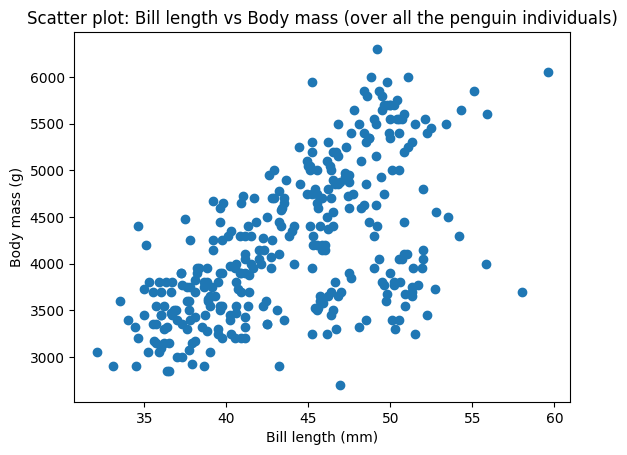

In [175]:
# @title
#-Primero miremos de los individuos-cada pinguino solito-
plt.scatter(df_limpio["bill_length_mm"], df_limpio["body_mass_g"]) #-uso el limpio, por si luego toca hacer calculos-
plt.xlabel("Bill length (mm)")
plt.ylabel("Body mass (g)")
plt.title("Scatter plot: Bill length vs Body mass (over all the penguin individuals)")

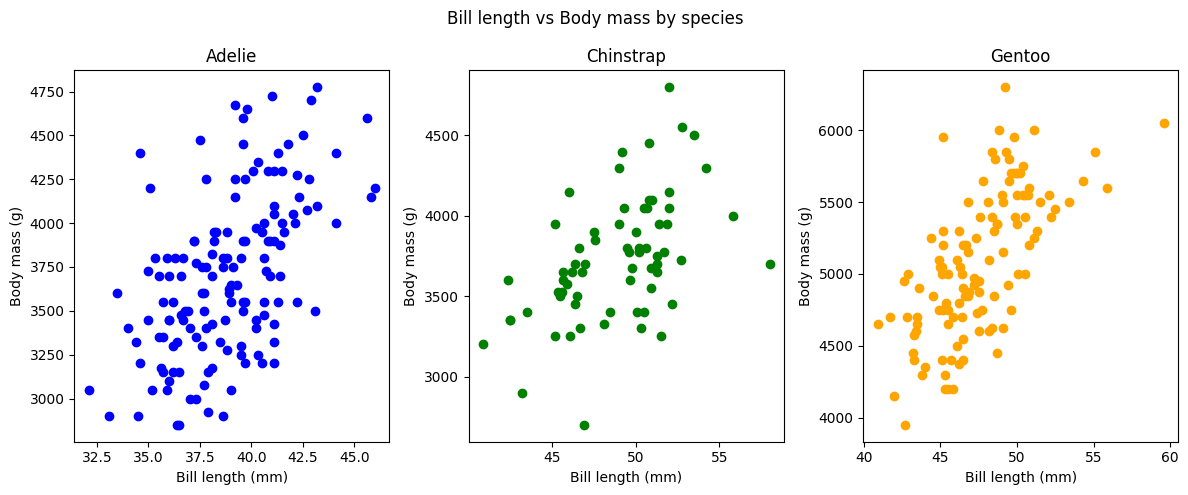

In [176]:
# @title
plt.figure(figsize=(12,5))

# Adelie
plt.subplot(1,3,1)
sub = df_limpio[df_limpio["species"] == "Adelie"]
plt.scatter(sub["bill_length_mm"], sub["body_mass_g"], color="blue")
plt.xlabel("Bill length (mm)")
plt.ylabel("Body mass (g)")
plt.title("Adelie")

# Chinstrap
plt.subplot(1,3,2)
sub = df_limpio[df_limpio["species"] == "Chinstrap"]
plt.scatter(sub["bill_length_mm"], sub["body_mass_g"], color="green")
plt.xlabel("Bill length (mm)")
plt.ylabel("Body mass (g)")
plt.title("Chinstrap")

# Gentoo
plt.subplot(1,3,3)
sub = df_limpio[df_limpio["species"] == "Gentoo"]
plt.scatter(sub["bill_length_mm"], sub["body_mass_g"], color="orange")
plt.xlabel("Bill length (mm)")
plt.ylabel("Body mass (g)")
plt.title("Gentoo")

plt.suptitle("Bill length vs Body mass by species")
plt.tight_layout()

Note que se puede observar que en general, tanto por inidividuo-pinguino individual como analizandolo por especie-grupo de pinguinos, tenemos que a mas largo el pico, mas pesados son..... y diria yo que donde esta relacion es mas fuerte y clara es el los Gentoo en cambio en los otros hay como mayor dispersion (el peor de todos diria yo son los Chinstrap pues se ven como menos compactos aunque tambien es verdad que estos eran los que menos poblacion tenian y eso a la final afecta)

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

In [177]:
df_limpio.groupby("species")[["bill_length_mm", "body_mass_g"]].corr()  #-calculamos la matriz de correlacion de Pearson entre "bill_length_mm" y "body_mass_g" para
                                                                        #  cada especie... note que r_xy=r_yx, esta normalizada entre -1 y 1, y es la que mide la
                                                                        #  relacion lineal entre variables (para otros metodos toca poner como argumento
                                                                        #  method="spearman" o method="kendall)"-

bill_length_mm  body_mass_g
species                                              
Adelie    bill_length_mm        1.000000     0.544276
          body_mass_g           0.544276     1.000000
Chinstrap bill_length_mm        1.000000     0.513638
          body_mass_g           0.513638     1.000000
Gentoo    bill_length_mm        1.000000     0.666730
          body_mass_g           0.666730     1.000000

In [178]:
df_limpio.groupby("species")[["bill_length_mm", "body_mass_g"]].corr().iloc[0::2,-1]  #-saltando de a 2 registros (de 2 en 2) para solo quedar con los datos-filas de
                                                                                      #  bill_length_mm, y con la ultima columna (-1) que es body_mass_g. De modo
                                                                                      #  que sacaremos asi solo los coeficientes r=r_xy=r_yx de Pearson-

,,body_mass_g
species,,
Adelie,bill_length_mm,0.544276
Chinstrap,bill_length_mm,0.513638
Gentoo,bill_length_mm,0.666730


In [179]:
df_limpio.groupby("species")[["bill_length_mm", "body_mass_g"]].corr().iloc[0::2,-1].info()

<class 'pandas.core.series.Series'>
MultiIndex: 3 entries, ('Adelie', 'bill_length_mm') to ('Gentoo', 'bill_length_mm')
Series name: body_mass_g
Non-Null Count  Dtype  
--------------  -----  
3 non-null      float64
dtypes: float64(1)
memory usage: 350.0+ bytes


In [180]:
df_limpio.groupby("species")[["bill_length_mm", "body_mass_g"]].corr().iloc[0::2,-1].rename("coeficente de correlacion de Pearson (r)")
                                                                                                                          #-con .rename("coeficente de Pearson") le
                                                                                                                          #  cambiamos el nombre de body_mass_g a la
                                                                                                                          #  serie a coeficente de Pearson-

,,coeficente de correlacion de Pearson (r)
species,,
Adelie,bill_length_mm,0.544276
Chinstrap,bill_length_mm,0.513638
Gentoo,bill_length_mm,0.666730


In [181]:
df_limpio.groupby(["species"]).bill_length_mm.describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,38.823973,2.662597,32.1,36.725,38.85,40.775,46.0
Chinstrap,68.0,48.833824,3.339256,40.9,46.350,49.55,51.075,58.0
Gentoo,119.0,47.568067,3.106116,40.9,45.350,47.40,49.600,59.6


Anteriormente a partir de los diagramas de dispersión ya habiamos concluido ciertas cosas en cuanato a la correlacion, por ejemplo, que se observa-muestra una relación-tendencia positiva (i,e miramos la direccion hasta cierto punto) entre la longitud del pico y la masa corporal de los pingüinos para todas las especies: a mayor longitud de pico, mayor tiende a ser la masa corporal. Sin embargo, la fuerza de la relacion (y la direccion 100$ descrita) no se menciono con una medida de manera precisa (no se cuantifico), sino que se concluyo mas o menos a punta de ver que tan compacta o no se veia la dispersion y que tanto seguia una linea recta creciente. Aun asi, parece ser que dicho analisis no quedo tan mal, porque con los resultados recientemente obtenidos via el calculo del coeficiente de correlación de Pearson por especie, tenemos que se confirma lo que alla-previamente dijimos, en el punto anterior, en la comparacion entre especies, pues ademas de confirmar la obviedad de que la correlación es positiva en las tres especies, mostramos con cifras que la intensidad varía y que efectivamente los Gentoo's muestran la relación más fuerte (r≈0.67), mostrando una clara tendencia lineal. Mientras que en Adelie's y Chinstrap's es más moderada, anque en el primero es mas fuerte (r≈0.54) y en el segundo es algo más débil (r≈0.51).

De manera que esto indica, y concluimos con que en general, los pingüinos con picos más largos tienden a tener una mayor masa corporal, aunque la fuerza de esta relación vemos que depende de la especie. Ademas, via revision de por ejemplo la desviacion estandar, podriamos decir que se podria descartar que la baja fuerza de correlacion que presentan Chinstrap's se deba a variabilidad interna i,e a su std, pues tanto los Adelie's que tienen un menor std como los Gentoo's que tienen un mayor std presentan una coeficiente de correlacion de Pearson r, mayor que que el de los Chinstrap's

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?

Text(0.5, 1.0, 'Scatter plot: Flipper length vs Sex (over all the penguin individuals)')

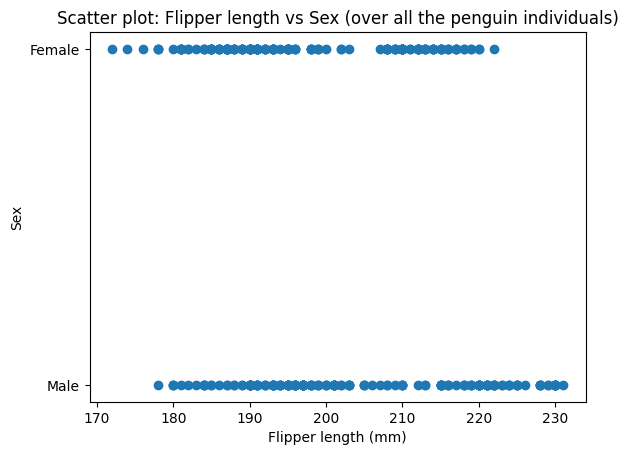

In [182]:
# @title
#-Primero miremos de los individuos-cada pinguino solito-
plt.scatter(df_limpio["flipper_length_mm"], df_limpio["sex"]) #-uso el limpio, por si luego toca hacer calculos-
plt.xlabel("Flipper length (mm)")
plt.ylabel("Sex")
plt.title("Scatter plot: Flipper length vs Sex (over all the penguin individuals)")

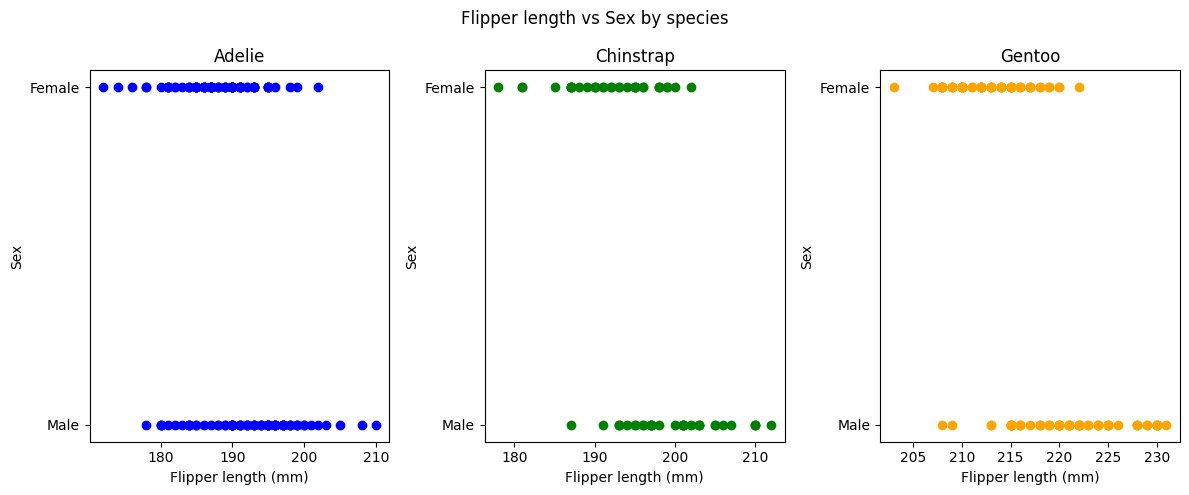

In [183]:
# @title
plt.figure(figsize=(12,5))

# Adelie
plt.subplot(1,3,1)
sub = df_limpio[df_limpio["species"] == "Adelie"]
plt.scatter(sub["flipper_length_mm"], sub["sex"], color="blue")
plt.xlabel("Flipper length (mm)")
plt.ylabel("Sex")
plt.title("Adelie")

# Chinstrap
plt.subplot(1,3,2)
sub = df_limpio[df_limpio["species"] == "Chinstrap"]
#plt.scatter(sub["flipper_length_mm"], sub["sex"], color="green")
plt.scatter(sub["flipper_length_mm"], sub["sex"].map({"Male":0, "Female":1}), color="green")
plt.yticks([0,1],["Male", "Female"])
plt.xlabel("Flipper length (mm)")
plt.ylabel("Sex")
plt.title("Chinstrap")

# Gentoo
plt.subplot(1,3,3)
sub = df_limpio[df_limpio["species"] == "Gentoo"]
#plt.scatter(sub["flipper_length_mm"], sub["sex"], color="orange")
plt.scatter(sub["flipper_length_mm"], sub["sex"].map({"Male":0, "Female":1}), color="orange")
plt.yticks([0,1],["Male", "Female"])
plt.xlabel("Flipper length (mm)")
plt.ylabel("Sex")
plt.title("Gentoo")

plt.suptitle("Flipper length vs Sex by species")
plt.tight_layout()

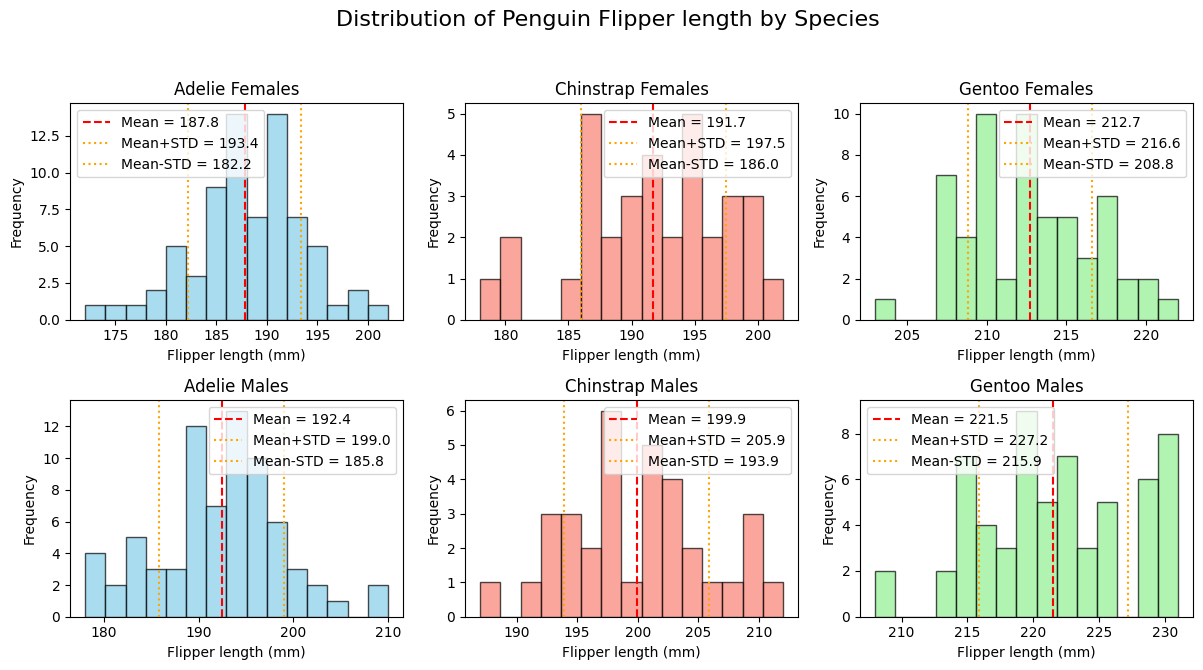

In [184]:
# @title
plt.figure(figsize=(12,7))
#------------------------------------------Female-------------------------------------------------
# Adelie
plt.subplot(2, 3, 1)
data = df_limpio[(df_limpio.species=="Adelie") & (df_limpio.sex=="Female")].flipper_length_mm
mean = data.mean()
std = data.std()
plt.hist(data, bins=15, color="skyblue", edgecolor="black", alpha=0.7)
plt.axvline(mean, color="red", linestyle="--", label=f"Mean = {mean:.1f}")
plt.axvline(mean+std, color="orange", linestyle=":", label=f"Mean+STD = {mean+std:.1f}")
plt.axvline(mean-std, color="orange", linestyle=":", label=f"Mean-STD = {mean-std:.1f}")
plt.title("Adelie Females")
plt.xlabel("Flipper length (mm)")
plt.ylabel("Frequency")
plt.legend()

# Chinstrap
plt.subplot(2, 3, 2)
data = df_limpio[(df_limpio.species=="Chinstrap") & (df_limpio.sex=="Female")].flipper_length_mm
mean = data.mean()
std = data.std()
plt.hist(data, bins=15, color="salmon", edgecolor="black", alpha=0.7)
plt.axvline(mean, color="red", linestyle="--", label=f"Mean = {mean:.1f}")
plt.axvline(mean+std, color="orange", linestyle=":", label=f"Mean+STD = {mean+std:.1f}")
plt.axvline(mean-std, color="orange", linestyle=":", label=f"Mean-STD = {mean-std:.1f}")
plt.title("Chinstrap Females")
plt.xlabel("Flipper length (mm)")
plt.ylabel("Frequency")
plt.legend()

# Gentoo
plt.subplot(2, 3, 3)
data = df_limpio[(df_limpio.species=="Gentoo") & (df_limpio.sex=="Female")].flipper_length_mm
mean = data.mean()
std = data.std()
plt.hist(data, bins=15, color="lightgreen", edgecolor="black", alpha=0.7)
plt.axvline(mean, color="red", linestyle="--", label=f"Mean = {mean:.1f}")
plt.axvline(mean+std, color="orange", linestyle=":", label=f"Mean+STD = {mean+std:.1f}")
plt.axvline(mean-std, color="orange", linestyle=":", label=f"Mean-STD = {mean-std:.1f}")
plt.title("Gentoo Females")
plt.xlabel("Flipper length (mm)")
plt.ylabel("Frequency")
plt.legend()

#-------------------------------------------Male---------------------------------------------------
# Adelie
plt.subplot(2, 3, 4)
data = df_limpio[(df_limpio.species=="Adelie") & (df_limpio.sex=="Male")].flipper_length_mm
mean = data.mean()
std = data.std()
plt.hist(data, bins=15, color="skyblue", edgecolor="black", alpha=0.7)
plt.axvline(mean, color="red", linestyle="--", label=f"Mean = {mean:.1f}")
plt.axvline(mean+std, color="orange", linestyle=":", label=f"Mean+STD = {mean+std:.1f}")
plt.axvline(mean-std, color="orange", linestyle=":", label=f"Mean-STD = {mean-std:.1f}")
plt.title("Adelie Males")
plt.xlabel("Flipper length (mm)")
plt.ylabel("Frequency")
plt.legend()

# Chinstrap
plt.subplot(2, 3, 5)
data = df_limpio[(df_limpio.species=="Chinstrap") & (df_limpio.sex=="Male")].flipper_length_mm
mean = data.mean()
std = data.std()
plt.hist(data, bins=15, color="salmon", edgecolor="black", alpha=0.7)
plt.axvline(mean, color="red", linestyle="--", label=f"Mean = {mean:.1f}")
plt.axvline(mean+std, color="orange", linestyle=":", label=f"Mean+STD = {mean+std:.1f}")
plt.axvline(mean-std, color="orange", linestyle=":", label=f"Mean-STD = {mean-std:.1f}")
plt.title("Chinstrap Males")
plt.xlabel("Flipper length (mm)")
plt.ylabel("Frequency")
plt.legend()

# Gentoo
plt.subplot(2, 3, 6)
data = df_limpio[(df_limpio.species=="Gentoo") & (df_limpio.sex=="Male")].flipper_length_mm
mean = data.mean()
std = data.std()
plt.hist(data, bins=15, color="lightgreen", edgecolor="black", alpha=0.7)
plt.axvline(mean, color="red", linestyle="--", label=f"Mean = {mean:.1f}")
plt.axvline(mean+std, color="orange", linestyle=":", label=f"Mean+STD = {mean+std:.1f}")
plt.axvline(mean-std, color="orange", linestyle=":", label=f"Mean-STD = {mean-std:.1f}")
plt.title("Gentoo Males")
plt.xlabel("Flipper length (mm)")
plt.ylabel("Frequency")
plt.legend()

plt.suptitle("Distribution of Penguin Flipper length by Species", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

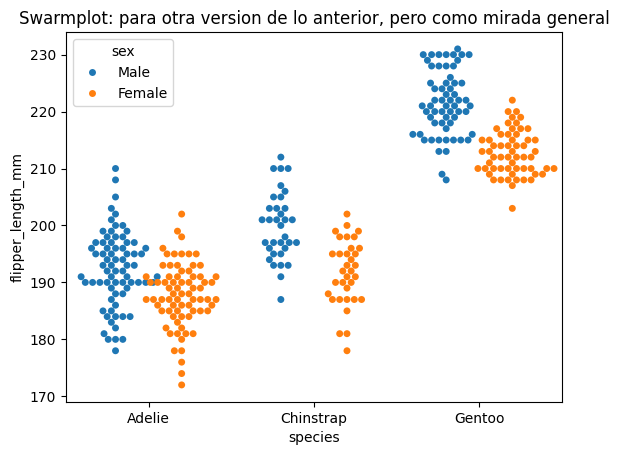

In [185]:
# --- SWARMPLOT ---
sns.swarmplot(data=df_limpio, x="species", y="flipper_length_mm", hue="sex", dodge=True)
plt.title("Swarmplot: para otra version de lo anterior, pero como mirada general")
plt.show()

In [186]:
df_limpio.groupby(["species","sex"]).flipper_length_mm.describe()

count        mean       std    min     25%    50%     75%  \
species   sex                                                                 
Adelie    Female   73.0  187.794521  5.595035  172.0  185.00  188.0  191.00   
          Male     73.0  192.410959  6.599317  178.0  189.00  193.0  197.00   
Chinstrap Female   34.0  191.735294  5.754096  178.0  187.25  192.0  195.75   
          Male     34.0  199.911765  5.976558  187.0  196.00  200.5  203.00   
Gentoo    Female   58.0  212.706897  3.897856  203.0  210.00  212.0  215.00   
          Male     61.0  221.540984  5.673252  208.0  218.00  221.0  225.00   

                    max  
species   sex            
Adelie    Female  202.0  
          Male    210.0  
Chinstrap Female  202.0  
          Male    212.0  
Gentoo    Female  222.0  
          Male    231.0

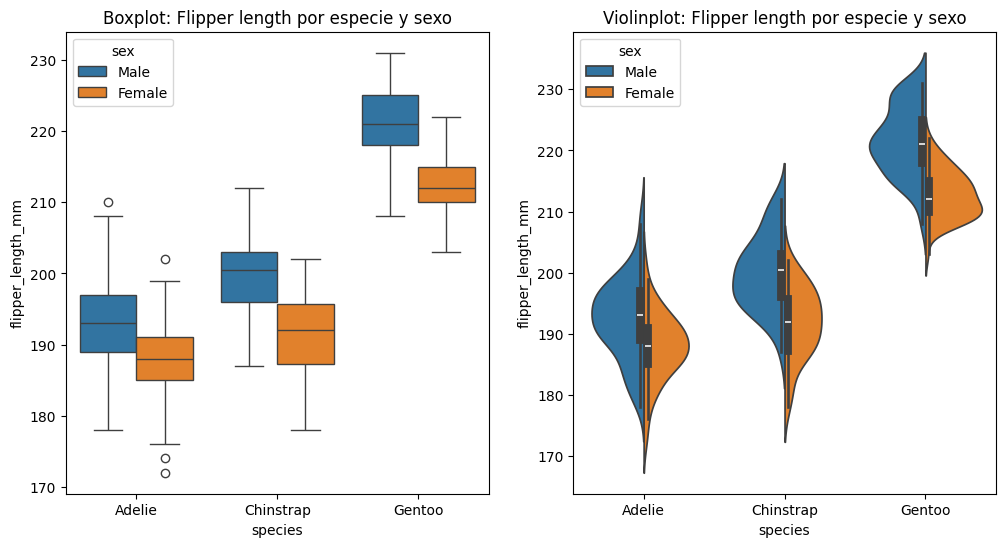

In [187]:
# @title
#import matplotlib.pyplot as plt
#import seaborn as sns

# --- BOXPLOT ---
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_limpio, x="species", y="flipper_length_mm", hue="sex")
plt.title("Boxplot: Flipper length por especie y sexo")

# --- VIOLINPLOT ---
plt.subplot(1, 2, 2)
sns.violinplot(data=df_limpio, x="species", y="flipper_length_mm", hue="sex", split=True)
plt.title("Violinplot: Flipper length por especie y sexo")
plt.show()

In [188]:
nueva_provicional = df_limpio.groupby(["species","sex"]).flipper_length_mm.mean().unstack().copy()  #-unstack pone female y male como columnas y ya queda agrupado
                                                                                                    #  solo por sexo-
nueva_provicional["Diferencia (mm)"] = nueva_provicional["Female"] - nueva_provicional["Male"]
nueva_provicional

sex,Female,Male,Diferencia (mm)
species,,,
Adelie,187.794521,192.410959,-4.616438
Chinstrap,191.735294,199.911765,-8.176471
Gentoo,212.706897,221.540984,-8.834087


In [189]:
#-note que que no podemos reusar:-
#df_limpio.groupby(["species","sex"])[["flipper_length_mm", "sex"]].corr()   #-porque tocaria primero volver "sex" en 0's y 1's-
#-por ello:-
df_limpio_provicional = df_limpio.copy()
df_limpio_provicional.sex = df_limpio_provicional.sex.map({"Male":0, "Female":1})
df_limpio_provicional.groupby(["species"])[["flipper_length_mm", "sex"]].corr()
df_limpio_provicional

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...,...
328,338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,1
329,340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
330,341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,0
331,342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


In [190]:
df_limpio_provicional.groupby(["species"])[["flipper_length_mm", "sex"]].corr()

flipper_length_mm       sex
species                                                 
Adelie    flipper_length_mm           1.000000 -0.355141
          sex                        -0.355141  1.000000
Chinstrap flipper_length_mm           1.000000 -0.577495
          sex                        -0.577495  1.000000
Gentoo    flipper_length_mm           1.000000 -0.673352
          sex                        -0.673352  1.000000

In [191]:
df_limpio_provicional.groupby(["species"])[["flipper_length_mm", "sex"]].corr().iloc[0::2,-1].rename("coeficente de correlacion de Pearson (r)")

,,coeficente de correlacion de Pearson (r)
species,,
Adelie,flipper_length_mm,-0.355141
Chinstrap,flipper_length_mm,-0.577495
Gentoo,flipper_length_mm,-0.673352


Realizado-conseguido lo anterior, vemos como este análisis exploratorio-descriptivo de la longitud de aleta (flipper length) en pingüinos mostró diferencias consistentes entre sexos y especies, y se observo que:

* Por especie, los Gentoo presentaron las aletas más largas en promedio, seguidos de los Chinstrap y finalmente los Adelie.
* Por sexo, los machos mostraron sistemáticamente longitudes mayores que las hembras dentro de cada especie:
  - Adelie: diferencia ≈ 4.6 mm
  - Chinstrap: diferencia ≈ 8.2 mm
  - Gentoo: diferencia ≈ 8.8 mm
* Estas diferencias (no solo las diferencias del pto anterior, sino en general los dos puntos anteriores) se visualizaron claramente a lo largo de los graficos, aun asi, en aquellos donde esto salta a la vista serian los de dispersion, el swarmplot, el boxplot y el violinplot, donde las distribuciones masculinas se encuentran desplazadas hacia valores mayores respecto a las femeninas y tambien se ve como la especie influye (cabe notar, que con esto, no decimos que los histogramas no den fe de ello, sino que toca mirarlos de manera un poco mas detenida para poder notar esto, aun asi son de los graficos que mas tienen informacion precisa por este mismo motivo).
* Aunque el sexo es una variable categórica, la correlación de Pearson aplicada en este caso corresponde en realidad a la correlación punto-biserial, que es válida y equivalente a Pearson cuando una de las variables es dicotómica. Es por ello que adoptando-planteando esto fue que en dicho-via aquel análisis (i,e planteando las cosas así vía considerar el formular que estamos bajo una codificacion de los machos como 0 y las hembras como 1 que) se encontró que las correlaciones entre sexo y longitud de aleta fueron moderadas a fuertes y negativas (Adelie: -0.36, Chinstrap: -0.58, Gentoo: -0.67), lo que confirma la tendencia de que ser macho está asociado a aletas más largas..... Esto no implica causalidad, pero sí refleja de manera cuantitativa la diferencia de medias observada en los gráficos y resúmenes descriptivos (porque cuando codificamos "sex" como Male = 0 y Female = 1, tenemos que la media de X (sexo) es la proporción de hembras y la media de Y (flipper_length) es la media global de las longitudes, luego la covarianza básicamente mide la diferencia entre la media de machos y la de hembras, ponderada por varianzas i,e tenemos que Pearson, que mide cuánto se parecen las variaciones de dos variables numéricas como $r = \frac{\text{cov}(X,Y)}{\sigma_X \sigma_Y}$, en este contexto es exactamente la correlación punto-biserial i,e un indicador de cuánto se diferencian los promedios entre los dos grupos...... solo mencionar que se dice que X es la proporcion de hermbras y no de machos, porque codificamos Male = 0 y Female = 1, si hubieramos codificado Male = 1 y Female = 0, entonces la media de X seria la proporcion de machos, pues al final del dia es las suma de 1's y 0's divido sobre casos totales, y pues el cero no aporta nada. Entonces segun el caso queda sobre n_hembras o n_machos dividido total individuos. En otras palabras: el promedio de la variable dicotómica siempre representa la proporción del grupo codificado como 1)
* Las distribuciones (y en general todo lo calculado y graficado) mostraron además que, aunque existe cierta superposición entre sexos (especialmente en Adelie), la separación entre grupos es más evidente en Chinstrap y particularmente en Gentoo.

En conclusión, la variable sexo explica parte importante de la variabilidad en la longitud de las aletas, con machos consistentemente más grandes, y las diferencias son más marcadas en Chinstrap y Gentoo que en Adelie.

## **Test de hipótesis**

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.

la verdad lamas sencilla o la fija es jugar con lo que vimos en 16 xD, porque pille que podemos tirar un prueba de hipotesis con la diferencia de aleta promedio entre los generos, lo cual es totalmente analogo a lo que se hizo en clase con las mamas fumadoras o no fumadoras y el peso del bebe. Asi pues:

Hipótesis nula ($H_0$):  
No existe diferencia significativa en la longitud promedio de la aleta entre machos y hembras de pingüinos.  

$$ H_0: \mu_{\text{Male}} = \mu_{\text{Female}} $$  

Hipótesis alternativa ($H_1$):  
Sí existe una diferencia significativa en la longitud promedio de la aleta entre machos y hembras de pingüinos.  

$$ H_1: \mu_{\text{Male}} \neq \mu_{\text{Female}} $$

In [193]:
df_limpio

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...,...
328,338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [120]:
df_limpio.groupby("sex")["flipper_length_mm"].mean()

,flipper_length_mm
sex,
Female,197.363636
Male,204.505952


In [119]:
df_limpio.groupby("sex")["flipper_length_mm"].mean().values()

array([197.36363636, 204.50595238])

In [121]:
#-Diferencia real de medias-
real_means = df_limpio.groupby("sex")["flipper_length_mm"].mean().copy()
diferencia_observada = real_means["Female"] - real_means["Male"]
print("Diferencia observada (Female - Male):", diferencia_observada)

Diferencia observada (Female - Male): -7.142316017316006


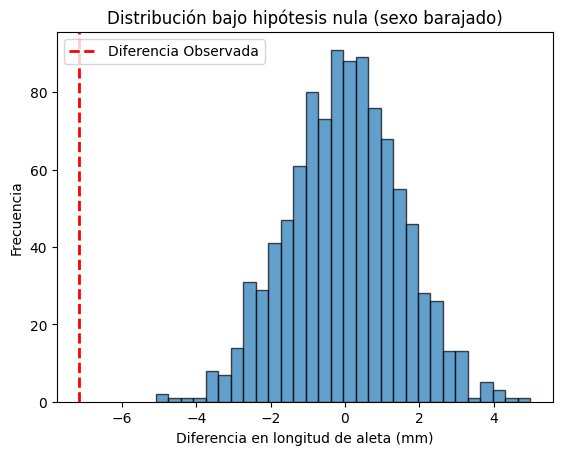

p-valor aproximado: 0.000999000999000999


In [194]:
#-Función: diferencia de medias dado un label-
def diferencia_medias(data, label_col):
    means = data.groupby(label_col)["flipper_length_mm"].mean().values
    return means[0] - means[1]  # orden arbitrario, pero consistente

#-Permutación (hipótesis nula)-
def permutar_una_vez():
    shuffled_labels = df_limpio["sex"].sample(frac=1, replace=False).reset_index(drop=True)
    shuffled_df = df_limpio.copy()
    shuffled_df["Shuffled"] = shuffled_labels
    return diferencia_medias(shuffled_df, "Shuffled")

#-Repetir muchas veces-
repeticiones = 1000
diferencias = [permutar_una_vez() for _ in range(repeticiones)]

#-Graficar-
plt.hist(diferencias, bins=30, edgecolor="black", alpha=0.7)
plt.axvline(diferencia_observada, color="red", linestyle="dashed", linewidth=2, label="Diferencia Observada")
plt.title("Distribución bajo hipótesis nula (sexo barajado)")
plt.xlabel("Diferencia en longitud de aleta (mm)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

#-Calcular p-valor (proporción de permutaciones más extremas que la observada)-
p_valor = (np.sum(np.abs(diferencias) >= np.abs(diferencia_observada)) + 1) / (repeticiones + 1)
print("p-valor aproximado:", p_valor)

De esta manera, con este último resultado se muestra que la diferencia observada en la longitud de la aleta entre sexos se encuentra muy alejada de lo esperado bajo la hipótesis nula de independencia. Pues, en efecto, la línea roja (que corresponde a la diferencia del promedio del tamaño de la aleta entre hembras y machos en los datos originales) esta muy a la izquierda de la distribución nula (que esta en azul), la cual representa lo que se esperaría si sexo y longitud de aleta fueran independientes. El valor p obtenido (≈ 0.001) indica que la probabilidad de observar una diferencia de medias tan extrema únicamente por azar es menor al 0.1%. Por lo tanto, rechazamos la hipótesis nula ($H_0$) y concluimos que existe evidencia estadísticamente significativa de que el sexo está asociado con la longitud de la aleta.

Ahora bien, si además unimos este resultado con los coeficientes de correlación de Pearson ($r$) previamente calculados, incluso podemos ampliar nuestra conclusión a que: no solo existe evidencia estadísticamente significativa de que el sexo se asocia a la longitud de la aleta, sino que, además, por ello, se sigue que, tambien se demostra por "trasitividad" de esto, que existe evidencia estadísticamente significativa de que ser macho está asociado a una mayor longitud de aleta. Es decir, los machos tienen aletas en promedio más largas que las hembras, de modo que nuestro test pasó (o puede pasar) de ser solo bilateral a unilateral en dirección negativa-hacia abajo, y ser comprobable ($ H_1: \mu_{\text{Male}} \neq \mu_{\text{Female}} ⟶ \mu_{\text{Male}} > \mu_{\text{Female}}$)........ palabras mas palabras menos, la correlación que elegimos no se explica por aleatoriedad.